In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [2]:
df_magic_raw = pd.read_csv("magic04.csv", header=None)
df_annthyroid_raw = pd.read_csv("annthyroid.csv", header=None)
df_seismic_raw = pd.read_csv("seismic.csv", header=None)

In [3]:
df_magic_raw

,0,1,2,3,4,5,6,7,8,9,10
0,0.296208,0.085816,0.406505,0.106035,0.106831,0.390870,0.657489,0.494704,0.982929,0.553649,-1
1,0.264850,0.073442,0.227203,0.483578,0.506297,0.392227,0.410353,0.489440,0.709816,0.262033,-1
2,0.639720,0.264542,0.443022,0.140016,0.106979,0.732251,0.415194,0.385419,0.854711,0.489160,-1
3,0.472227,0.339511,0.609610,0.091942,0.074826,0.412321,0.285033,0.391743,0.113370,0.589703,-1
4,0.047007,0.075485,0.208368,0.591090,0.396355,0.457517,0.590456,0.509181,0.889363,0.126393,-1
...,...,...,...,...,...,...,...,...,...,...,...
18617,0.210467,0.089468,0.414991,0.219911,0.156023,0.522742,0.688964,0.495537,0.096722,0.438029,1
18618,0.063433,0.054588,0.117741,0.526083,0.355608,0.430602,0.567477,0.502047,0.558220,0.385304,1
18619,0.054826,0.025611,0.054465,0.827935,0.560083,0.418438,0.570193,0.551346,0.353000,0.555916,1
18620,0.093179,0.075923,0.394559,0.359814,0.244184,0.465129,0.628841,0.514169,0.008557,0.379607,1


In [4]:
df_annthyroid_raw

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.750000,1,0,1,1,1,1,1,0,1,...,1,1,1,1,0.001132,0.080780,0.197324,0.300926,0.225000,1
1,0.239583,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.000472,0.164345,0.235786,0.537037,0.165625,1
2,0.479167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.003585,0.130919,0.167224,0.527778,0.118750,1
3,0.656250,0,1,1,1,1,1,1,1,1,...,1,1,1,1,0.001698,0.091922,0.125418,0.337963,0.129688,1
4,0.229167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.000472,0.142061,0.229097,0.337963,0.235938,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7085,0.604167,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0.004717,0.113092,0.128763,0.379630,0.121875,1
7086,0.520833,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.200000,0.030641,0.005017,0.333333,0.005469,-1
7087,0.520833,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0.001434,0.109192,0.147157,0.231481,0.206250,1
7088,0.354167,0,1,1,1,1,1,1,1,1,...,1,1,1,1,0.005283,0.109192,0.147157,0.333333,0.154688,1


In [5]:
df_seismic_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,0.0,0,0.005633,0.006864,0.019389,0.018201,0.0,0.111111,0.0,0.142857,0.0,0,0,0,0,0.004975,0.0050,1
1,0,0.0,0,0.003063,0.006200,0.011186,0.019272,0.0,0.000000,0.0,0.000000,0.0,0,0,0,0,0.000000,0.0000,1
2,0,0.0,0,0.011065,0.037422,0.054437,0.145610,0.0,0.111111,0.0,0.142857,0.0,0,0,0,0,0.007463,0.0075,1
3,0,0.0,0,0.004831,0.012179,0.024609,0.047109,0.0,0.000000,0.0,0.000000,0.0,0,0,0,0,0.000000,0.0000,1
4,0,0.0,1,0.024527,0.042737,0.017151,0.033191,0.0,0.000000,0.0,0.000000,0.0,0,0,0,0,0.000000,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2362,1,0.0,1,0.031327,0.173384,0.393736,0.264454,0.5,0.000000,0.0,0.000000,0.0,0,0,0,0,0.000000,0.0000,1
2363,1,0.0,1,0.016185,0.122453,0.230425,0.229122,0.0,0.000000,0.0,0.000000,0.0,0,0,0,0,0.000000,0.0000,1
2364,1,0.0,1,0.010348,0.119132,0.146905,0.222698,0.0,0.000000,0.0,0.000000,0.0,0,0,0,0,0.000000,0.0000,1
2365,0,0.0,1,0.006176,0.070859,0.073080,0.104925,0.0,0.000000,0.0,0.000000,0.0,0,0,0,0,0.000000,0.0000,1


In [6]:
device = "cpu"

In [7]:
y_magic = pd.get_dummies(df_magic_raw.iloc[:,10:])

y_magic = torch.Tensor(y_magic.values).to(device)

y_magic

tensor([[-1.],
        [-1.],
        [-1.],
        ...,
        [ 1.],
        [ 1.],
        [ 1.]])

In [8]:
y_annthyroid = pd.get_dummies(df_annthyroid_raw.iloc[:,21:])

y_annthyroid = torch.Tensor(y_annthyroid.values).to(device)

y_annthyroid

tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]])

In [9]:
y_seismic = pd.get_dummies(df_seismic_raw.iloc[:,18:])

y_seismic = torch.Tensor(y_seismic.values).to(device)

y_seismic

tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]])

In [10]:
x_magic = df_magic_raw.iloc[:,0:10]

x_magic = (x_magic - x_magic.min()) / (x_magic.max() - x_magic.min())

x_magic = torch.Tensor(x_magic.values).to(device)

x_magic

tensor([[0.2962, 0.0858, 0.4065,  ..., 0.4947, 0.9829, 0.5536],
        [0.2649, 0.0734, 0.2272,  ..., 0.4894, 0.7098, 0.2620],
        [0.6397, 0.2645, 0.4430,  ..., 0.3854, 0.8547, 0.4892],
        ...,
        [0.0548, 0.0256, 0.0545,  ..., 0.5513, 0.3530, 0.5559],
        [0.0932, 0.0759, 0.3946,  ..., 0.5142, 0.0086, 0.3796],
        [0.0962, 0.0676, 0.2557,  ..., 0.5000, 0.0711, 0.3276]])

In [11]:
x_annthyroid = df_annthyroid_raw.iloc[:,0:21]

x_annthyroid = (x_annthyroid - x_annthyroid.min()) / (x_annthyroid.max() - x_annthyroid.min())

x_annthyroid = torch.Tensor(x_annthyroid.values).to(device)

x_annthyroid

tensor([[0.7500, 1.0000, 0.0000,  ..., 0.1973, 0.3009, 0.2250],
        [0.2396, 1.0000, 1.0000,  ..., 0.2358, 0.5370, 0.1656],
        [0.4792, 1.0000, 1.0000,  ..., 0.1672, 0.5278, 0.1187],
        ...,
        [0.5208, 1.0000, 1.0000,  ..., 0.1472, 0.2315, 0.2062],
        [0.3542, 0.0000, 1.0000,  ..., 0.1472, 0.3333, 0.1547],
        [0.7500, 1.0000, 1.0000,  ..., 0.1321, 0.3380, 0.1375]])

In [12]:
x_seismic = df_seismic_raw.iloc[:,0:18]

x_seismic = (x_seismic - x_seismic.min()) / (x_seismic.max() - x_seismic.min())

x_seismic = torch.Tensor(x_seismic.values).to(device)

x_seismic

tensor([[0.0000, 0.0000, 0.0000,  ...,    nan, 0.0050, 0.0050],
        [0.0000, 0.0000, 0.0000,  ...,    nan, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ...,    nan, 0.0075, 0.0075],
        ...,
        [1.0000, 0.0000, 1.0000,  ...,    nan, 0.0000, 0.0000],
        [0.0000, 0.0000, 1.0000,  ...,    nan, 0.0000, 0.0000],
        [0.0000, 0.0000, 1.0000,  ...,    nan, 0.0000, 0.0000]])

In [13]:
class Autoencoder(nn.Module):
    # Layers is an array of integers representing the encoder architecture
    # Example: 30 --> 3 --> 30: layers = [30, 3]
    def __init__(self, layers):
        super().__init__()
        self.in_dim = layers[0]
        self.activation = nn.Sigmoid()
        self.layers = layers
        
        # Encoder
        self.encoder_layers = []
        
        for i in range(len(layers) - 1):
            self.encoder_layers.append(nn.Linear(layers[i], layers[i+1]))
            self.encoder_layers.append(nn.Sigmoid())
        
        self.encoder_sequence = nn.Sequential(*self.encoder_layers)
            
        # Decoder
        self.decoder_layers = []
        
#         for i in range(len(layers) - 1, 0, -1):
#             self.decoder_layers.append(nn.Linear(layers[i], layers[i - 1]))
#             self.decoder_layers.append(nn.Sigmoid())
    
#         layers.reverse()
#         for i in range(len(layers) - 1):
#             self.decoder_layers.append(nn.Linear(layers[i], layers[i+1]))
#             self.decoder_layers.append(nn.Sigmoid())

        reversed_layers = sorted(layers, reverse=False)
        for i in range(len(reversed_layers) - 1):
            self.decoder_layers.append(nn.Linear(reversed_layers[i], reversed_layers[i+1]))
            self.decoder_layers.append(nn.Sigmoid())
        
        self.decoder_sequence = nn.Sequential(*self.decoder_layers)
        
    def encode(self, x):
        return self.encoder_sequence(x)
    
    def decode(self, x):
        return self.decoder_sequence(x)
    
    def forward(self, x):
        x = self.encode(x)
        y = self.decode(x)
        return y

In [14]:
model = Autoencoder([10, 5, 3])

print(model)

Autoencoder(
  (activation): Sigmoid()
  (encoder_sequence): Sequential(
    (0): Linear(in_features=10, out_features=5, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=5, out_features=3, bias=True)
    (3): Sigmoid()
  )
  (decoder_sequence): Sequential(
    (0): Linear(in_features=3, out_features=5, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=5, out_features=10, bias=True)
    (3): Sigmoid()
  )
)


In [15]:
# Custom dataset to treat how the model picks an x, y combination from the dataset
class AutoencoderDataset(Dataset):
    def __init__(self, x):
        self.x = x
        
    def __len__(self):
        return len(self.x)
    
    # Requires you to return data as a pair of _x, _y
    def __getitem__(self, index):
        return self.x[index], self.x[index]

In [16]:
learning_rate = 0.001
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
batch_size = 5

In [17]:
# Define the training process
# Each call of the train function == 1 Epoch
def train_fn(loader, model, optimizer, loss_fn, batch_size):
    loop = tqdm(loader)
    
    count = 0
    ave_loss = 0.00
    
    # Loop per batch
    for batch_idx, (data, targets) in enumerate(loop):
        predictions = model.forward(data)
        
        loss = loss_fn(predictions, targets)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        loop.set_postfix(loss=loss.item())
        
        ave_loss += loss.item()
        count += 1
        
    ave_loss = ave_loss / count
    
    return ave_loss

# use Dataloader for Autoencoder 
custom_dataset = AutoencoderDataset(x_magic)

train_loader = DataLoader(
    custom_dataset,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False
)

epochs = 100
losses = []

for epoch in range(epochs):
    print("Epoch: {}".format(epoch))
    
    ave_loss = train_fn(
        train_loader,
        model,
        optimizer,
        loss_fn,
        batch_size
    )
    
    losses.append(ave_loss)
    
    print("Ave Loss: {}".format(ave_loss))
    
    state = { 'state_dict': model.state_dict() }

    torch.save(state, "autoencoder.pth")

Epoch: 0


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 445.43it/s, loss=0.00579]


Ave Loss: 0.02145151233356821
Epoch: 1


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 444.22it/s, loss=0.00329]


Ave Loss: 0.012552328832297517
Epoch: 2


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 438.14it/s, loss=0.00263]


Ave Loss: 0.009385567578024561
Epoch: 3


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 453.08it/s, loss=0.00234]


Ave Loss: 0.009125872863575366
Epoch: 4


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 432.22it/s, loss=0.00221]


Ave Loss: 0.009051507540365943
Epoch: 5


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 431.68it/s, loss=0.00214]


Ave Loss: 0.00900891713187061
Epoch: 6


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:09<00:00, 402.43it/s, loss=0.00209]


Ave Loss: 0.008964233320618936
Epoch: 7


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:09<00:00, 394.45it/s, loss=0.00206]


Ave Loss: 0.008894353725075497
Epoch: 8


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:09<00:00, 397.41it/s, loss=0.00227]


Ave Loss: 0.008551653898805505
Epoch: 9


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:09<00:00, 393.57it/s, loss=0.00219]


Ave Loss: 0.0055823894615922645
Epoch: 10


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 413.91it/s, loss=0.00211]


Ave Loss: 0.00447310574035529
Epoch: 11


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 414.28it/s, loss=0.00202]


Ave Loss: 0.004179411098461023
Epoch: 12


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 414.67it/s, loss=0.00191]


Ave Loss: 0.003987531509803571
Epoch: 13


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 417.29it/s, loss=0.00182]


Ave Loss: 0.003869483095934402
Epoch: 14


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 414.09it/s, loss=0.00176]


Ave Loss: 0.0037987427566444263
Epoch: 15


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:09<00:00, 404.96it/s, loss=0.00172]


Ave Loss: 0.003751213885062443
Epoch: 16


100%|████████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 425.84it/s, loss=0.0017]


Ave Loss: 0.0037124146281697808
Epoch: 17


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 425.71it/s, loss=0.00169]


Ave Loss: 0.0036767800001196262
Epoch: 18


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:09<00:00, 406.21it/s, loss=0.00168]


Ave Loss: 0.003642660445446186
Epoch: 19


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 462.05it/s, loss=0.00167]


Ave Loss: 0.0036093102481478713
Epoch: 20


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 452.04it/s, loss=0.00166]


Ave Loss: 0.0035755109797925657
Epoch: 21


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 423.56it/s, loss=0.00165]


Ave Loss: 0.0035385058170040733
Epoch: 22


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 433.90it/s, loss=0.00165]


Ave Loss: 0.0034913257902156837
Epoch: 23


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 443.51it/s, loss=0.00164]


Ave Loss: 0.0034096542015459213
Epoch: 24


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 460.04it/s, loss=0.00162]


Ave Loss: 0.0031598467902271016
Epoch: 25


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 465.30it/s, loss=0.00161]


Ave Loss: 0.002747082735721222
Epoch: 26


100%|████████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 449.86it/s, loss=0.0016]


Ave Loss: 0.002605190588217604
Epoch: 27


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 457.78it/s, loss=0.00159]


Ave Loss: 0.002540851383784086
Epoch: 28


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 464.31it/s, loss=0.00158]


Ave Loss: 0.0025006131173483403
Epoch: 29


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 455.76it/s, loss=0.00157]


Ave Loss: 0.0024709602307228236
Epoch: 30


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 453.13it/s, loss=0.00157]


Ave Loss: 0.0024472760403413175
Epoch: 31


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 443.99it/s, loss=0.00157]


Ave Loss: 0.0024276218381194684
Epoch: 32


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 434.78it/s, loss=0.00156]


Ave Loss: 0.0024109902215071473
Epoch: 33


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 463.23it/s, loss=0.00156]


Ave Loss: 0.0023967553712208847
Epoch: 34


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 461.48it/s, loss=0.00156]


Ave Loss: 0.0023844713135700575
Epoch: 35


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 453.30it/s, loss=0.00156]


Ave Loss: 0.0023737875694852797
Epoch: 36


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 443.07it/s, loss=0.00156]


Ave Loss: 0.0023644145062324535
Epoch: 37


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 453.79it/s, loss=0.00156]


Ave Loss: 0.0023561115506427026
Epoch: 38


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 456.95it/s, loss=0.00156]


Ave Loss: 0.00234868179316845
Epoch: 39


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 461.39it/s, loss=0.00156]


Ave Loss: 0.0023419659717505386
Epoch: 40


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 447.19it/s, loss=0.00156]


Ave Loss: 0.0023358339641083832
Epoch: 41


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 454.20it/s, loss=0.00155]


Ave Loss: 0.0023301806497456343
Epoch: 42


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 450.54it/s, loss=0.00155]


Ave Loss: 0.0023249199308279975
Epoch: 43


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 437.84it/s, loss=0.00155]


Ave Loss: 0.002319981271515119
Epoch: 44


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 433.20it/s, loss=0.00155]


Ave Loss: 0.00231530536230241
Epoch: 45


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 442.03it/s, loss=0.00155]


Ave Loss: 0.0023108424912300584
Epoch: 46


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 437.18it/s, loss=0.00155]


Ave Loss: 0.0023065493002474534
Epoch: 47


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 425.45it/s, loss=0.00155]


Ave Loss: 0.0023023880471244153
Epoch: 48


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:09<00:00, 408.21it/s, loss=0.00154]


Ave Loss: 0.0022983254587680925
Epoch: 49


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 446.77it/s, loss=0.00154]


Ave Loss: 0.002294330865147855
Epoch: 50


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 443.59it/s, loss=0.00154]


Ave Loss: 0.0022903751419003954
Epoch: 51


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 442.20it/s, loss=0.00154]


Ave Loss: 0.002286433104016262
Epoch: 52


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 445.31it/s, loss=0.00154]


Ave Loss: 0.0022824781500474993
Epoch: 53


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 434.50it/s, loss=0.00154]


Ave Loss: 0.0022784873397923983
Epoch: 54


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 432.59it/s, loss=0.00153]


Ave Loss: 0.002274437349027135
Epoch: 55


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 440.99it/s, loss=0.00153]


Ave Loss: 0.002270306528674051
Epoch: 56


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:08<00:00, 441.95it/s, loss=0.00153]


Ave Loss: 0.0022660762886751143
Epoch: 57


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:11<00:00, 333.18it/s, loss=0.00153]


Ave Loss: 0.0022617319919678363
Epoch: 58


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:11<00:00, 336.38it/s, loss=0.00153]


Ave Loss: 0.002257263395996239
Epoch: 59


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:11<00:00, 312.42it/s, loss=0.00153]


Ave Loss: 0.0022526665859708824
Epoch: 60


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:11<00:00, 319.06it/s, loss=0.00152]


Ave Loss: 0.002247949690267369
Epoch: 61


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:12<00:00, 307.50it/s, loss=0.00152]


Ave Loss: 0.0022431305413143773
Epoch: 62


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:11<00:00, 317.88it/s, loss=0.00152]


Ave Loss: 0.0022382411382382973
Epoch: 63


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:12<00:00, 309.76it/s, loss=0.00152]


Ave Loss: 0.0022333251326985583
Epoch: 64


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:11<00:00, 313.25it/s, loss=0.00152]


Ave Loss: 0.0022284371379666006
Epoch: 65


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:12<00:00, 308.64it/s, loss=0.00152]


Ave Loss: 0.0022236352821737027
Epoch: 66


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:12<00:00, 302.26it/s, loss=0.00151]


Ave Loss: 0.002218974772817299
Epoch: 67


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:11<00:00, 317.35it/s, loss=0.00151]


Ave Loss: 0.002214502224150964
Epoch: 68


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:11<00:00, 314.97it/s, loss=0.00151]


Ave Loss: 0.0022102494548143655
Epoch: 69


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:12<00:00, 302.97it/s, loss=0.00151]


Ave Loss: 0.0022062308560539625
Epoch: 70


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:12<00:00, 299.88it/s, loss=0.00151]


Ave Loss: 0.002202449474478259
Epoch: 71


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:14<00:00, 264.89it/s, loss=0.00151]


Ave Loss: 0.002198895627039722
Epoch: 72


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:13<00:00, 276.06it/s, loss=0.00151]


Ave Loss: 0.002195551972461227
Epoch: 73


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:12<00:00, 289.06it/s, loss=0.00151]


Ave Loss: 0.002192398104801049
Epoch: 74


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:12<00:00, 288.57it/s, loss=0.00151]


Ave Loss: 0.002189412244924519
Epoch: 75


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:15<00:00, 241.09it/s, loss=0.00151]


Ave Loss: 0.002186572359599042
Epoch: 76


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:14<00:00, 265.50it/s, loss=0.00151]


Ave Loss: 0.002183859902461397
Epoch: 77


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:13<00:00, 277.53it/s, loss=0.00151]


Ave Loss: 0.002181255199255784
Epoch: 78


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:13<00:00, 271.65it/s, loss=0.00151]


Ave Loss: 0.002178743120334455
Epoch: 79


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:17<00:00, 214.85it/s, loss=0.00152]


Ave Loss: 0.002176309612934359
Epoch: 80


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:17<00:00, 211.76it/s, loss=0.00152]


Ave Loss: 0.0021739441324056647
Epoch: 81


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:16<00:00, 222.90it/s, loss=0.00152]


Ave Loss: 0.0021716351364582977
Epoch: 82


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:12<00:00, 288.71it/s, loss=0.00152]


Ave Loss: 0.002169375100396511
Epoch: 83


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:11<00:00, 312.56it/s, loss=0.00152]


Ave Loss: 0.0021671569369805213
Epoch: 84


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:11<00:00, 316.02it/s, loss=0.00152]


Ave Loss: 0.002164975035585613
Epoch: 85


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:12<00:00, 293.95it/s, loss=0.00152]


Ave Loss: 0.0021628239222422504
Epoch: 86


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:13<00:00, 285.34it/s, loss=0.00152]


Ave Loss: 0.002160699948462995
Epoch: 87


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:13<00:00, 283.67it/s, loss=0.00152]


Ave Loss: 0.002158599517994948
Epoch: 88


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:12<00:00, 296.01it/s, loss=0.00152]


Ave Loss: 0.002156520527291374
Epoch: 89


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:14<00:00, 249.03it/s, loss=0.00152]


Ave Loss: 0.002154460022547876
Epoch: 90


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:13<00:00, 274.90it/s, loss=0.00152]


Ave Loss: 0.0021524160653751206
Epoch: 91


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:14<00:00, 262.85it/s, loss=0.00152]


Ave Loss: 0.002150388525704378
Epoch: 92


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:12<00:00, 300.59it/s, loss=0.00152]


Ave Loss: 0.0021483749327142003
Epoch: 93


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:12<00:00, 306.16it/s, loss=0.00152]


Ave Loss: 0.00214637517806802
Epoch: 94


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:11<00:00, 316.75it/s, loss=0.00152]


Ave Loss: 0.0021443888993743156
Epoch: 95


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:11<00:00, 320.12it/s, loss=0.00152]


Ave Loss: 0.00214241521076718
Epoch: 96


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:11<00:00, 321.55it/s, loss=0.00152]


Ave Loss: 0.0021404536610395777
Epoch: 97


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:11<00:00, 331.80it/s, loss=0.00152]


Ave Loss: 0.002138504770103117
Epoch: 98


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:11<00:00, 328.83it/s, loss=0.00152]


Ave Loss: 0.0021365687897313235
Epoch: 99


100%|███████████████████████████████████████████████████████████████| 3725/3725 [00:11<00:00, 311.13it/s, loss=0.00152]

Ave Loss: 0.002134645455739548


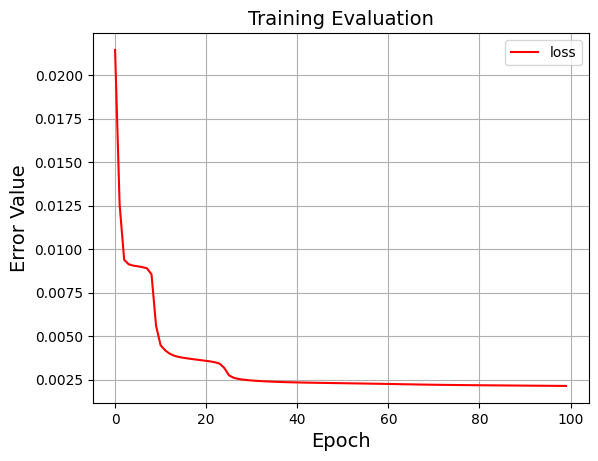

In [18]:
plt.plot(losses, label='loss', color='red')
plt.title('Training Evaluation', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Error Value', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [20]:
predictions = model(x_magic)

predictions

tensor([[0.1872, 0.1449, 0.3838,  ..., 0.5287, 0.9373, 0.5508],
        [0.0557, 0.0569, 0.1512,  ..., 0.5276, 0.7693, 0.2975],
        [0.3428, 0.2485, 0.5478,  ..., 0.5290, 0.8921, 0.5578],
        ...,
        [0.0470, 0.0361, 0.0907,  ..., 0.5282, 0.3835, 0.5589],
        [0.1518, 0.0743, 0.2937,  ..., 0.5254, 0.0206, 0.3810],
        [0.1227, 0.0731, 0.2645,  ..., 0.5256, 0.0798, 0.3159]],
       grad_fn=<SigmoidBackward0>)

In [26]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

predictions = model.forward(x_magic)
predictions = predictions.detach().cpu().numpy()

def reverse_ohe(predictions):
    ohe = []

    for i in predictions:
        if i[0] > i[1]:
            ohe.append([1, 0])
        else:
            ohe.append([0, 1])
    
    return ohe

preds = reverse_ohe(predictions)
preds = np.array(preds)
# accuracy_score(preds, y_magic)